In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice
from matplotlib import cm

In [2]:
df = pd.read_csv('./sentence_level_cluster 1.csv')

In [3]:
df.head()

,Unnamed: 0,sentence,aspect1,aspect2,CIK,company name,sic,sub-domain
0,0,"Upon entering the fourth quarter in March , we...",NaN,NaN,1750,AAR CORP,3720,AIRCRAFT & PARTS
1,1,"In response to the impact from COVID - 19 , we...",reduce expenses,hiring reducing,1750,AAR CORP,3720,AIRCRAFT & PARTS
2,2,"During the fourth quarter , we also exited und...",deferred arrangements,exit our joint venture investment,1750,AAR CORP,3720,AIRCRAFT & PARTS
3,3,"Additionally , in June 2020 , we decided to se...",focus core service,digital transformation,1750,AAR CORP,3720,AIRCRAFT & PARTS
4,4,We have also taken actions to preserve flexibi...,financial flexibility,preserve flexibility liquidity,1750,AAR CORP,3720,AIRCRAFT & PARTS


In [4]:
def dfconcat(df):
    df1 = df[['company name','sub-domain','aspect1']].rename(columns={'aspect1':'aspect'})
    df2 = df[['company name','sub-domain','aspect2']].rename(columns={'aspect2':'aspect'})
    # after drop duplicates, all aspects for each company
    df_concat = pd.concat([df1, df2], axis=0).sort_values(by="sub-domain", ascending=True).drop_duplicates().reset_index(drop=True)
    return df_concat

In [5]:
df_concat = dfconcat(df)
df_concat

,company name,sub-domain,aspect
0,CARBO CERAMICS INC,"ABRASIVE, ASBESTOS & MISC NONMETALLIC MINERAL ...",NaN
1,CARBO CERAMICS INC,"ABRASIVE, ASBESTOS & MISC NONMETALLIC MINERAL ...",store closures
2,CARBO CERAMICS INC,"ABRASIVE, ASBESTOS & MISC NONMETALLIC MINERAL ...",capture new customers
3,CARBO CERAMICS INC,"ABRASIVE, ASBESTOS & MISC NONMETALLIC MINERAL ...",prolonged work stoppage
4,CARBO CERAMICS INC,"ABRASIVE, ASBESTOS & MISC NONMETALLIC MINERAL ...",disruption business
...,...,...,...
31263,HOLOGIC INC,X-RAY APPARATUS & TUBES & RELATED IRRADIATION ...,support services prolonged
31264,HOLOGIC INC,X-RAY APPARATUS & TUBES & RELATED IRRADIATION ...,obtain supplies
31265,HOLOGIC INC,X-RAY APPARATUS & TUBES & RELATED IRRADIATION ...,exit our joint venture investment
31266,HOLOGIC INC,X-RAY APPARATUS & TUBES & RELATED IRRADIATION ...,reduced profitability


In [29]:
# merge the same meanful aspects
df_concat = df_concat.replace(to_replace='additional funding', value='additional capital')
df_concat = df_concat.replace(to_replace='reduce expenses', value='decrease spending')
df_concat = df_concat.replace(to_replace='prolonged work stoppage', value='stoppage')
df_concat = df_concat.replace(to_replace='obtain materials', value='find alternate sources')
df_concat = df_concat.replace(to_replace='obtain supplies', value='seek alternative suppliers')

In [30]:
impacts_list = ['experienced increase sales','reduced profitability','damage employee relations','lower productivity',
                'negatively impacts demand','economic and market uncertainty','adversely affect business',
                'impacted stock price','tax deferral','disruptions supply','disruption business']
# ,'disruptions supply','obtain clinical supplies','disruption business'

measures_list = ['financial flexibility','exit our joint venture investment','stop paying dividends','maintained cash',
                 'additional funding','additional capital','preserve flexibility liquidity','reduce costs',
                 'reduce expenses','decrease spending','exited underperforming','focus core service',
                 'support services prolonged','deferred arrangements','provide aftermarket service',
                 'increasing discount rates','advertising cancellations','digital transformation','reduce operations',
                 'adjusting business plan','remote working','avoid gatherings','impose travel restrictions',
                 'store closures','capture new customers','demand variability customers','reduce staffing',
                 'hiring reducing','retain key employees','sell composites','precautionary measure',
                 'reduce production','stoppage','prolonged work stoppage','temporarily suspend',
                 'closure airframe maintenance','reduce inventory levels','obtain materials','obtain supplies',
                 'find alternate sources','seek alternative suppliers','increase evaluate sensitivity',
                 'assessing impact','relief and stimulus','obtain clinical supplies']


In [31]:
df_impact = df_concat.loc[df_concat['aspect'].isin(impacts_list)]
df_measures = df_concat.loc[df_concat['aspect'].isin(measures_list)]

## Bar chart 1: Aspects frequency taken by all companies

In [32]:
# get the aspects amount in descending order
def df_count(df_concat):
    df_aspect_amount = df_concat['aspect'].value_counts().rename_axis('aspect').reset_index(name='counts')
    # top 10 
    print(df_aspect_amount.head(10),'\n')
    print('aspect_units:',len(df_aspect_amount))
    
    return df_aspect_amount

df_impact_amount = df_count(df_impact)
df_measures_amount = df_count(df_measures)

                            aspect  counts
0              disruption business    1947
1               disruptions supply    1065
2        damage employee relations     954
3  economic and market uncertainty     811
4        adversely affect business     758
5        negatively impacts demand     634
6       experienced increase sales     429
7                     tax deferral     363
8               lower productivity     341
9            reduced profitability     264 

aspect_units: 11
                         aspect  counts
0              assessing impact    1591
1    impose travel restrictions    1409
2    seek alternative suppliers    1276
3        find alternate sources    1030
4             decrease spending     884
5        digital transformation     863
6                store closures     845
7  demand variability customers     810
8          retain key employees     776
9         deferred arrangements     761 

aspect_units: 40


In [33]:
def plt_draw_impact(df_aspect_amount):
    fig=plt.figure(figsize=(20,25), dpi=80)
    grid = plt.GridSpec(2, 2, wspace=0.1, hspace=0.6)
    # x and y 
    x = df_aspect_amount['aspect']
    y = df_aspect_amount['counts']
    
# bar chart
    ax=plt.subplot(grid[0,0:2]) # If it is set to 221, create two rows and two columns
    plt.xticks(rotation=90)
    norm = plt.Normalize(y.min()*0.9, y.max()*1.1)
    norm_y = norm(y)
    # color choose from https://matplotlib.org/stable/tutorials/colors/colormaps.html

    name = 'OrRd'
    ax.set_title("#1 Count Of All Impacts ",size = 20, y =1.04, fontweight="bold")        
    map_vir = cm.get_cmap(name=name)
    color = map_vir(norm_y)
    rects = plt.bar(x, y, width=0.5, color=color)

    for rect in rects:
        x = rect.get_x()
        height = rect.get_height()
        ax.text(x+0.1,1.02*height,str(height),size = 15)

    plt.xticks(fontsize=15)

    plt.yticks(fontsize=15)    
    ax.set_ylabel("Counts",size = 23)
    ax.set_ylim(y.min()*0.98, y.max()*1.08)
    ax.grid(True)
    
# pie chart    
    ax=plt.subplot(grid[1,0:2]) # If it is set to 221, create two rows and two columns
    ax.set_title("#2 Percentage Of All Impacts ",size = 20, y =1.04, fontweight="bold")
    
    
    patches,l_text,p_text=plt.pie(y,labels = df_aspect_amount['aspect'],autopct= '%1.1f%%',shadow=False,colors = color)
    for t in l_text:
        t.set_size(13)
    for t in p_text:
        t.set_size(14)
    
#     ax.legend(loc='center', bbox_to_anchor=(-0.3, 0.85),fontsize=13)
    
    plt.suptitle("Impacts Caused by COVID To 3000+ Manufacturing Companies In 2020",size = 25, y =0.94, fontweight="bold")
    plt.show()    

In [34]:
def plt_draw_measures(df_aspect_amount):
    plt.figure(figsize=(20,10))
    ax = plt.subplot(111) # If it is set to 221, create two rows and two columns
    plt.xticks(rotation=90)
    # x and y 
    x = df_aspect_amount['aspect']
    y = df_aspect_amount['counts']

    norm = plt.Normalize(y.min(), y.max())
    norm_y = norm(y)
    # color choose from https://matplotlib.org/stable/tutorials/colors/colormaps.html
    name = 'Blues'
    ax.set_title("Measures Frequency By 3000+ Manufacturing Companies In 2020",size = 25, y =1.03, fontweight="bold")
    map_vir = cm.get_cmap(name=name)
    color = map_vir(norm_y)
    rects = plt.bar(x, y, width=0.5, color=color)

    for rect in rects[0:3]:
        x = rect.get_x()
        height = rect.get_height()
        ax.text(x-0.35,1.01*height,str(height),size = 15)        
    ax.set_xlabel("Measures",size = 23)
    plt.xticks(fontsize=15)

    plt.yticks(fontsize=15)    

    ax.set_ylabel("Counts",size = 23)


    ax.set_ylim(y.min()*0.95, y.max()*1.05)

    ax.grid(True)


    plt.show()

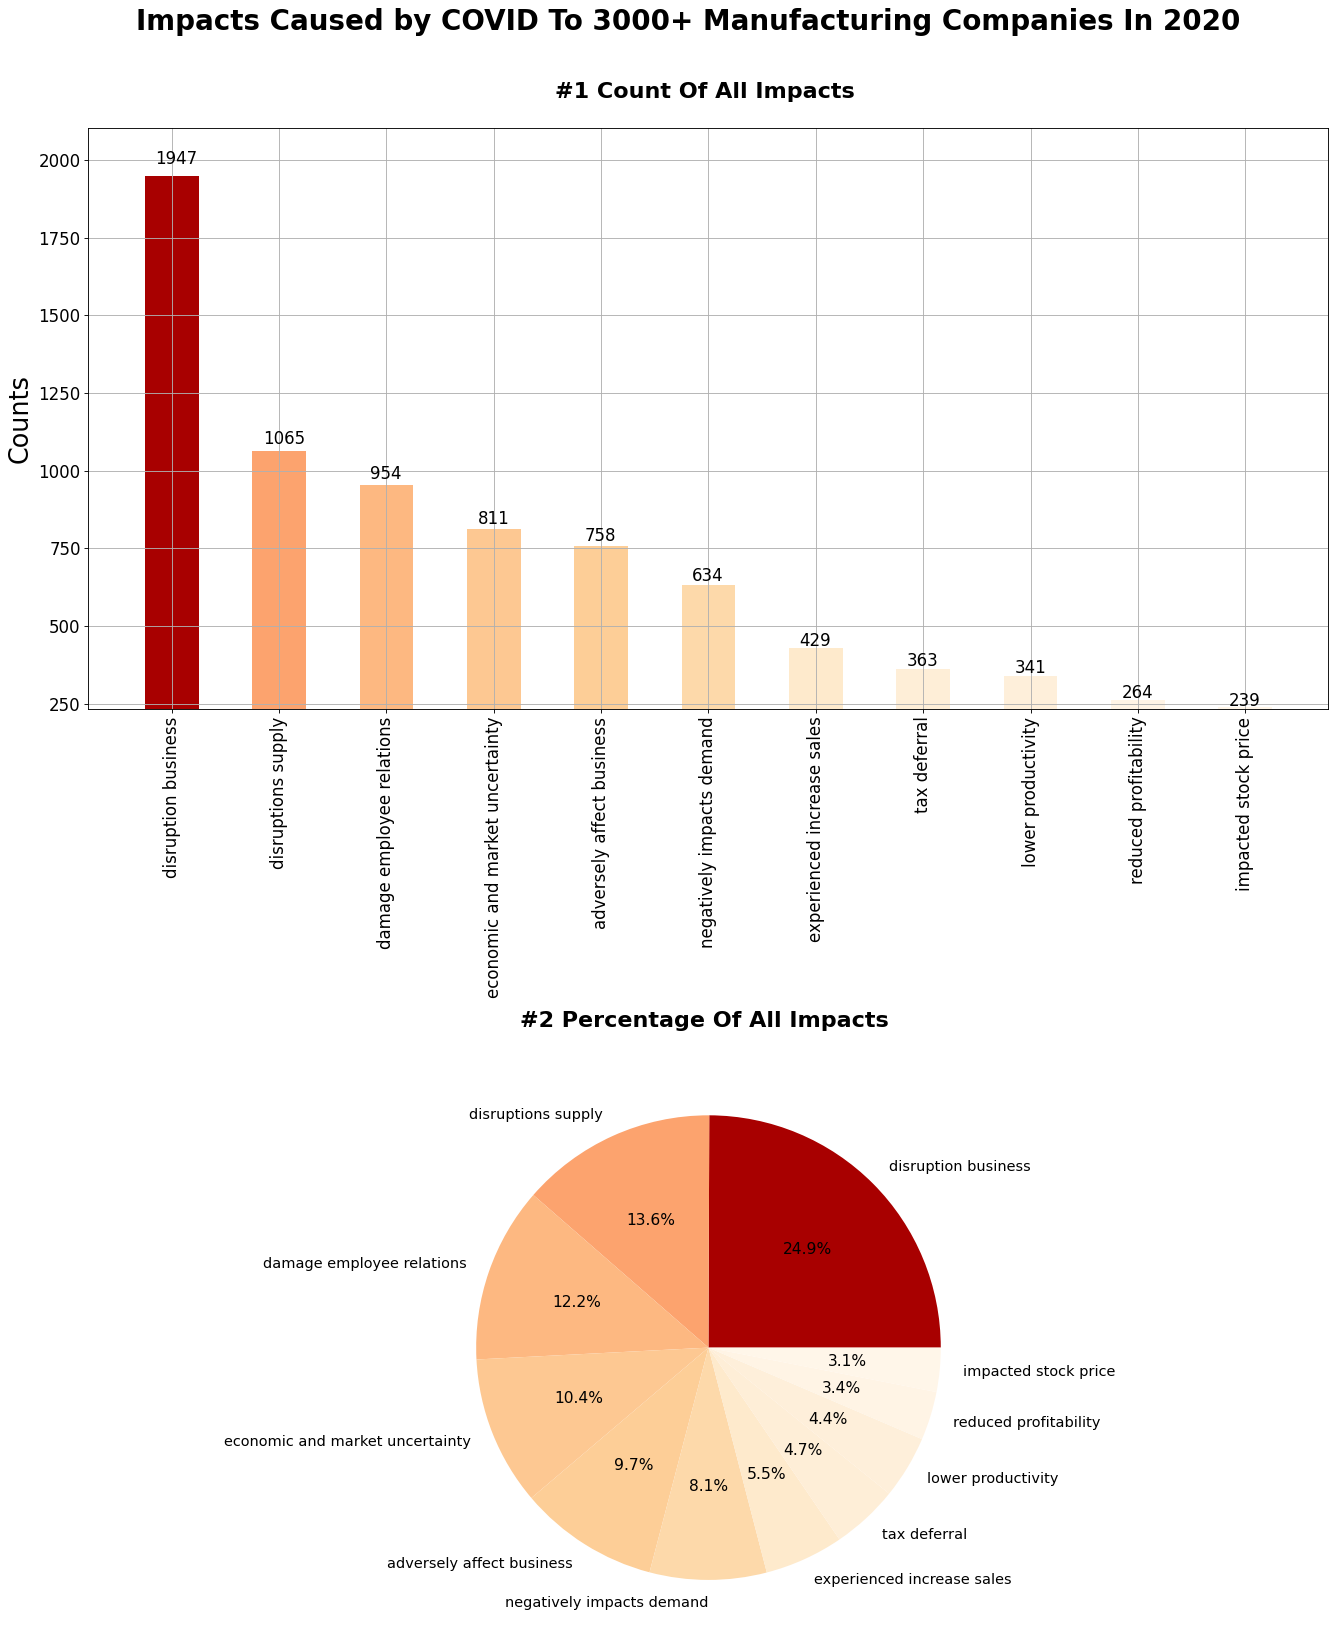

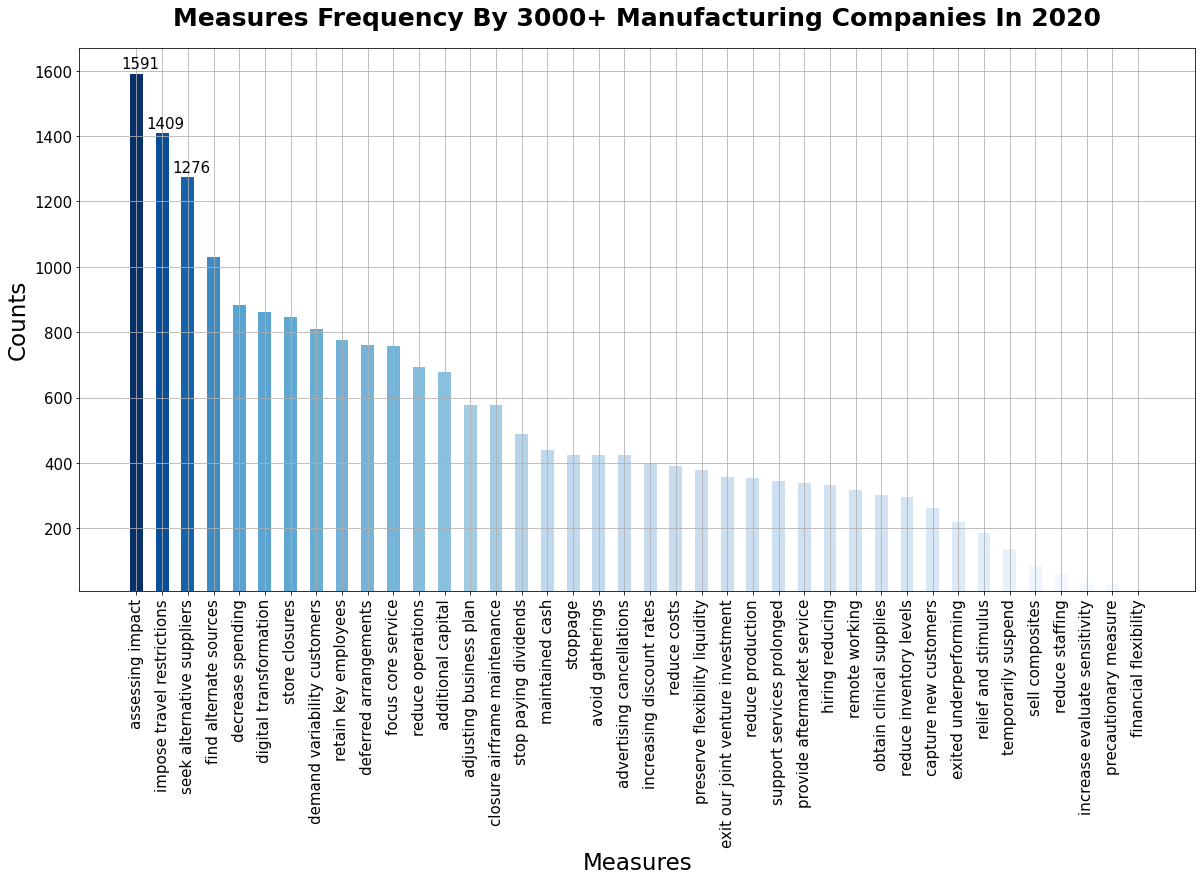

In [35]:
plt_draw_impact(df_impact_amount)
print('\n')
plt_draw_measures(df_measures_amount)

## Bar chart 2: Aspects frequency divided into sub-domain

In [36]:
# get the subdomain amount in descending order
df_subdomain_amount = df_concat['sub-domain'].value_counts().rename_axis('subdomain').reset_index(name='counts')
print('Total subdomain:',len(df_subdomain_amount))
df_subdomain_amount[0:6]

Total subdomain: 268


,subdomain,counts
0,PHARMACEUTICAL PREPARATIONS,3703
1,SERVICES-PREPACKAGED SOFTWARE,2067
2,SURGICAL & MEDICAL INSTRUMENTS & APPARATUS,1208
3,SEMICONDUCTORS & RELATED DEVICES,1182
4,"SERVICES-BUSINESS SERVICES, NEC",1011
5,"BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)",1006


In [37]:
subdomain6_list = list(df_subdomain_amount['subdomain'][0:6])

In [38]:
# impact divided by subdomain
def plt_draw_subimpact(df_impact):
    fig=plt.figure(figsize=(20,16), dpi=80)
    for i in range(len(subdomain6_list)):
        sub_df = df_impact[df_impact['sub-domain'] == subdomain6_list[i]]
        sub_df_aspect_amount = sub_df['aspect'].value_counts().rename_axis('aspect').reset_index(name='counts')
        #drawing
        x = sub_df_aspect_amount['aspect'][0:20]
        y = sub_df_aspect_amount['counts'][0:20]

        num = '23'+ str(1+i)
        ax=fig.add_subplot(num)
        plt.subplots_adjust(wspace = 0.2, hspace =0.8)
        plt.xticks(rotation=90)

        norm = plt.Normalize(y.min(), y.max())
        norm_y = norm(y)
        # color choose from https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # GnBu
        map_vir = cm.get_cmap(name='OrRd')
        color = map_vir(norm_y)

        rects = plt.bar(x, y, width=0.5, color=color)

        for rect in rects[0:1]:
            x = rect.get_x()
            height = rect.get_height()
            ax.text(x,1.01*height,str(height),size = 13)  

        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        ax.set_ylim(y.min()*0.95, y.max()*1.05)
        ax.set_ylabel("Counts",size = 13)

        ax.grid(True)
        ax.set_title(subdomain6_list[i],size = 13, y =1.02, fontweight="bold")

    plt.suptitle('Impact Frequency In Different Sub-industry',size = 25, y =0.95, fontweight="bold")
    plt.show()

In [39]:
# measures divided by subdomain
def plt_draw_submeasures(df_measures):
    fig=plt.figure(figsize=(20,16), dpi=80)
    for i in range(len(subdomain6_list)):
        sub_df = df_measures[df_measures['sub-domain'] == subdomain6_list[i]]
        sub_df_aspect_amount = sub_df['aspect'].value_counts().rename_axis('aspect').reset_index(name='counts')
        #drawing
        x = sub_df_aspect_amount['aspect'][0:20]
        y = sub_df_aspect_amount['counts'][0:20]

        num = '23'+ str(1+i)
        ax=fig.add_subplot(num)
        plt.subplots_adjust(wspace = 0.2, hspace =0.8)
        plt.xticks(rotation=90)

        norm = plt.Normalize(y.min(), y.max())
        norm_y = norm(y)
        # color choose from https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # GnBu
        map_vir = cm.get_cmap(name='GnBu')
        color = map_vir(norm_y)

        rects = plt.bar(x, y, width=0.5, color=color)

        for rect in rects[0:1]:
            x = rect.get_x()
            height = rect.get_height()
            ax.text(x-0.4,1.01*height,str(height),size = 13)  

        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        ax.set_ylim(y.min()*0.95, y.max()*1.05)
        ax.set_ylabel("Counts",size = 13)

        ax.grid(True)
        ax.set_title(subdomain6_list[i],size = 13, y =1.02, fontweight="bold")

    plt.suptitle('Measures Frequency In Different Sub-industry',size = 25, y =0.95, fontweight="bold")
    plt.show()

/var/folders/1f/nm7z61qj3qnbxz_5l6_2vq1h0000gn/T/ipykernel_16191/2562530588.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax=fig.add_subplot(num)


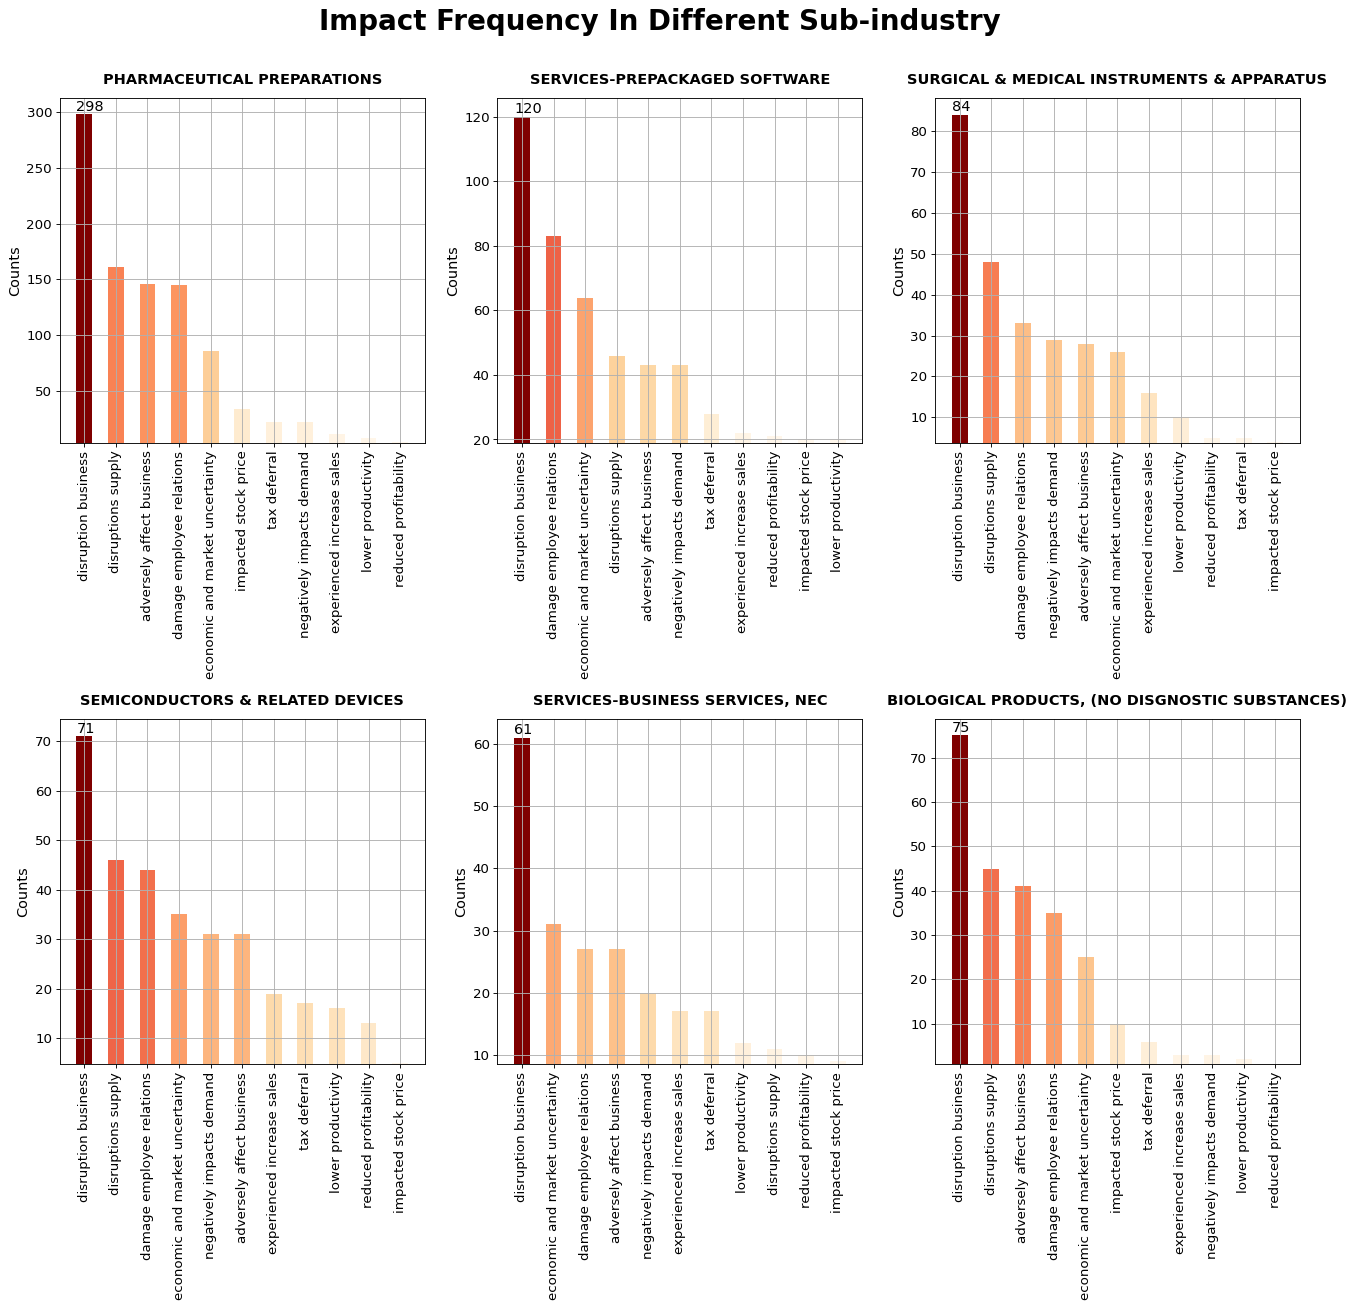

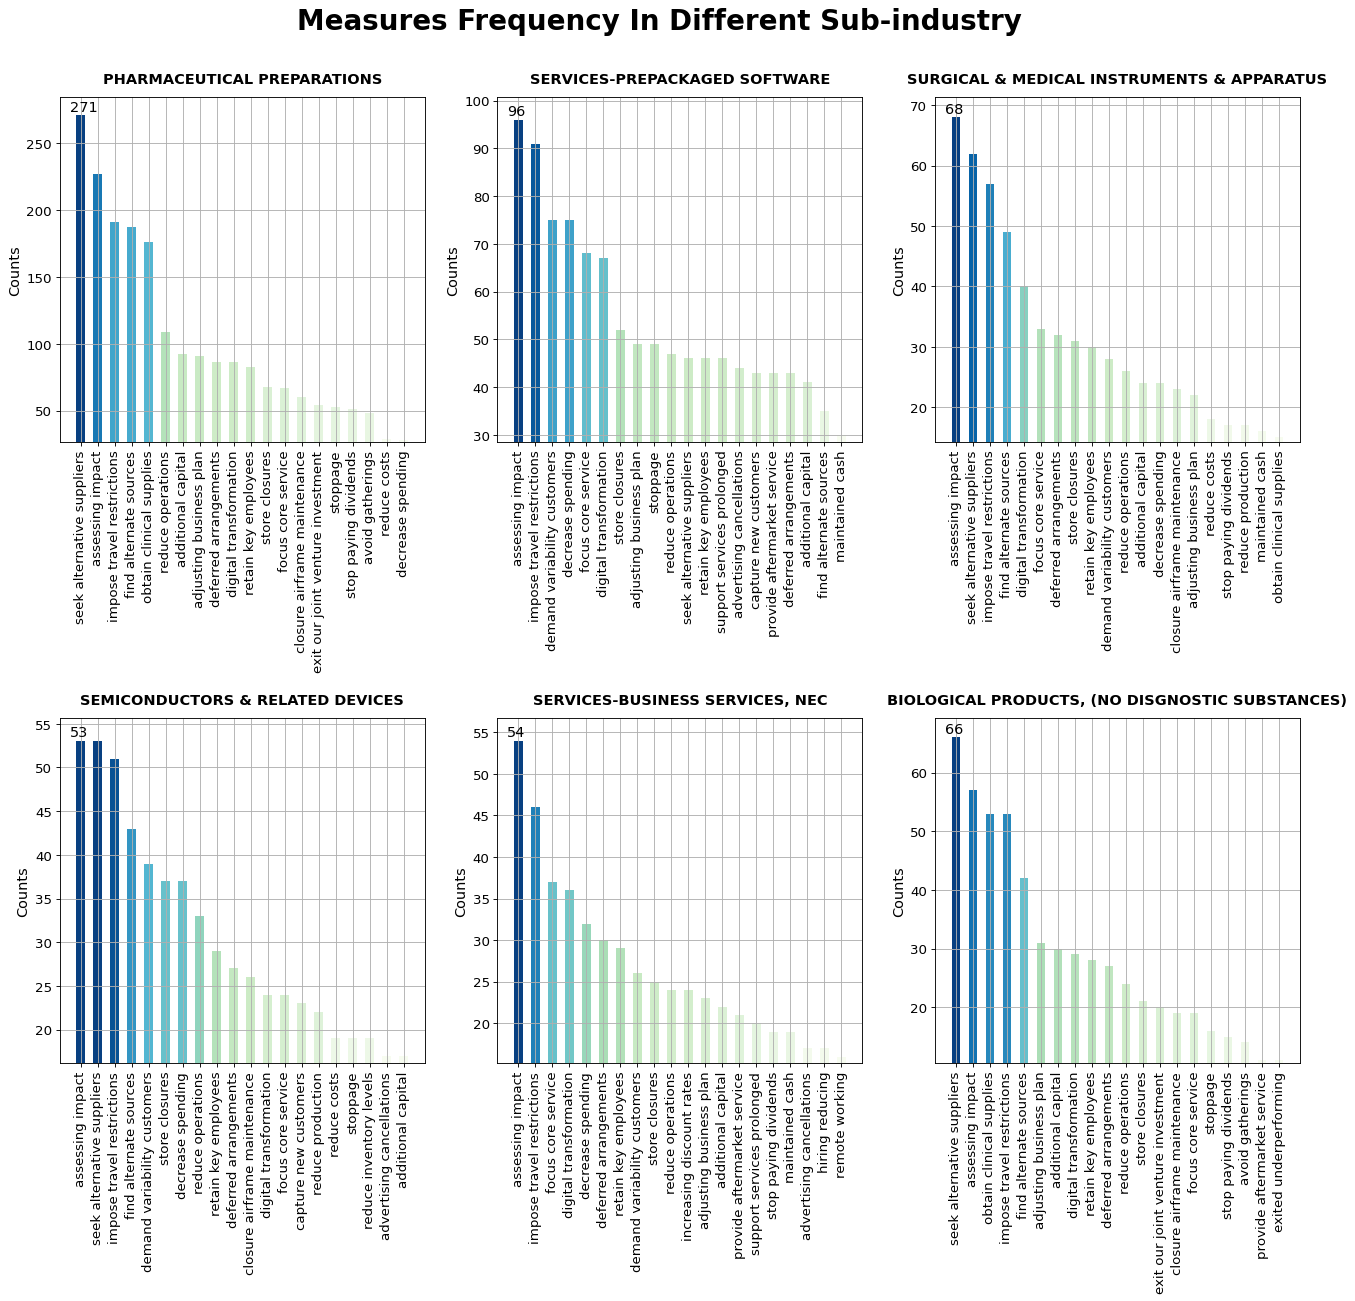

In [40]:
plt_draw_subimpact(df_impact)

plt_draw_submeasures(df_measures)